In [1]:
## Import statements
# For Latin Hypercube Sampling
from pyDOE2 import *
# For Analytical Model
from math import pi, cos, radians
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## Relationship between design parameters and buckling load
- The main goal is to have an idea of the relationships between the chosen design parameters and the buckling load as computed using the analytical model
- For this exercise, two parameters will be kept constant and the third will be varied within a range and the change in buckling load will be observed and plotted

In [2]:
### Analytical Model
def Pcr_Analytical(x,l,w,t,E_f,n_eigen):
    r_f = x[0] # in mm
    theta_f = x[1] # in degrees
    E_m = x[2] # in GPa
    #m = 1
    #n = 1
    P_cr = []
    poisson_ratio = 0.3
    v_f = volume_fraction(l,w,t,x)
    ## Rule of Mixtures
    E_effective = (E_f*v_f + (1-v_f)*E_m)*1e3 # Converting to N/mm^2
    D = E_effective*t**3/(12*(1-poisson_ratio**2)) # Flexural Rigidity
    for i in range(n_eigen):
        m = i+1
        n = 1
        P_cr.append(D*(pi*l/m)**2*((m/l)**2+(n/w)**2)**2)
    return P_cr
    
### Volume Fraction
def volume_fraction(length,width,thickness,x_design):
    r_f = x_design[0]
    theta_f = x_design[1]
    v_total = length*width*thickness
    l_fibre_shortest = length/(6*cos(radians(theta_f)))
    l_fibre_med = 2*l_fibre_shortest
    l_fibre_longest = 3*l_fibre_shortest
    vol_fibres = pi*(r_f**2)*(2*l_fibre_shortest + 2*l_fibre_med + l_fibre_longest)
    vol_total = length*width*thickness
    vol_frac = vol_fibres/vol_total
    return vol_frac

## Buckling load vs fibre radius
- The relationship between fibre radius and buckling load is explored in the following cell
- fibre angle is kept constant at 45 degrees
- Matrix Young's Modulus is kept constant at 1.5e5 N/mm^2 (150 GPa)
- Fibre Young's Modulus is taken as 0.4e5 N/mm^2 (40 GPa)
- Fibre radius is varied from 25 to 125 mm

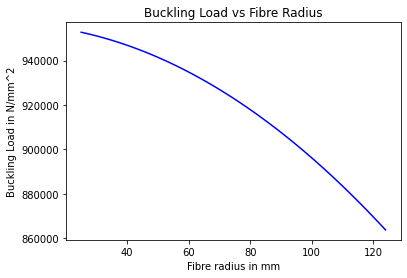

In [3]:
### Define the Constants
l_matrix = 3048 # in mm
w_matrix = l_matrix # in mm
t_matrix = 254 # in mm
E_fibre = 40 # in GPa
E_matrix = 150 # in GPa
theta_fibre = 45 # in degrees

r_f_min = 25 # in mm
r_f_max = 125 # in mm
r_f_vec = np.arange(r_f_min, r_f_max)

n_eigen = 1 # Number of requested Buckling Eigen Values
y_analytical = []
for r_f in r_f_vec:
    x = [r_f, theta_fibre, E_matrix] 
    y_analytical.append(Pcr_Analytical(x,l_matrix,w_matrix,t_matrix,E_fibre,n_eigen))

fig1 = plt.figure()
plt.plot(r_f_vec,y_analytical,'b-')
plt.xlabel('Fibre radius in mm')
plt.ylabel('Buckling Load in N/mm^2')
plt.title('Buckling Load vs Fibre Radius')
plt.show()
fig1.savefig('Pvsrf.png')

## Buckling load vs fibre angle
- The relationship between fibre angle and buckling load is explored in the following cell
- fibre radius is kept constant at 75 mm
- Matrix Young's Modulus is kept constant at 1.5e5 N/mm^2 (150 GPa)
- Fibre Young's Modulus is taken as 0.4e5 N/mm^2 (40 GPa)
- Fibre angle is varied from -89 to 89 degrees (cos(theta) = 0 for theta = n*90)

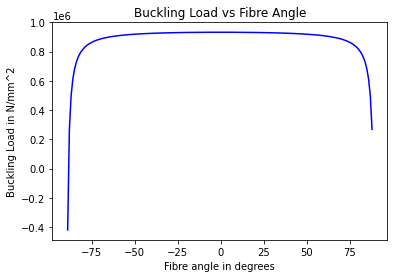

In [4]:
### Define the Constants
l_matrix = 3048 # in mm
w_matrix = l_matrix # in mm
t_matrix = 254 # in mm
E_fibre = 40 # in GPa
E_matrix = 150 # in GPa
r_fibre = 75 # in mm

theta_f_min = -89 # in mm
theta_f_max = 89 # in mm
theta_f_vec = np.arange(theta_f_min, theta_f_max)

n_eigen = 1 # Number of requested Buckling Eigen Values
y_analytical = []
for theta_f in theta_f_vec:
    x = [r_fibre, theta_f, E_matrix] 
    y_analytical.append(Pcr_Analytical(x,l_matrix,w_matrix,t_matrix,E_fibre,n_eigen))

fig2 = plt.figure()
plt.plot(theta_f_vec,y_analytical,'b-')
plt.xlabel('Fibre angle in degrees')
plt.ylabel('Buckling Load in N/mm^2')
plt.title('Buckling Load vs Fibre Angle')
plt.show()
fig2.savefig('Pvsthetaf.png')

## Buckling load vs matrix Young's Modulus
- The relationship between matrix Young's Modulus and buckling load is explored in the following cell
- Fibre radius is kept constant at 75 mm
- Fibre angle is kept constant at 45 degrees
- Fibre Young's Modulus is taken as 0.4e5 N/mm^2 (40 GPa)
- Matrix Young's Modulus is varied from 10 to 800 GPa (0.1e5 to 8e5 N/mm^2)

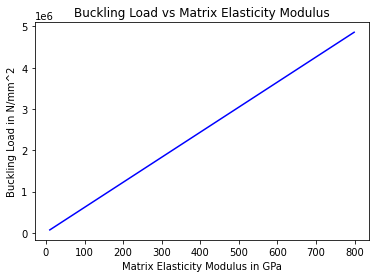

In [5]:
### Define the Constants
l_matrix = 3048 # in mm
w_matrix = l_matrix # in mm
t_matrix = 254 # in mm
E_fibre = 40 # in GPa
r_fibre = 75 # in mm
theta_fibre = 45 # in degrees

E_m_min = 10 # in GPa
E_m_max = 800 # in GPa
E_m_vec = np.arange(E_m_min, E_m_max)

n_eigen = 1 # Number of requested Buckling Eigen Values
y_analytical = []
for E_m in E_m_vec:
    x = [r_fibre, theta_fibre, E_m] 
    y_analytical.append(Pcr_Analytical(x,l_matrix,w_matrix,t_matrix,E_fibre,n_eigen))

fig3 = plt.figure()
plt.plot(E_m_vec,y_analytical,'b-')
plt.xlabel('Matrix Elasticity Modulus in GPa')
plt.ylabel('Buckling Load in N/mm^2')
plt.title('Buckling Load vs Matrix Elasticity Modulus')
plt.show()
fig3.savefig('PvsEm.png')